### IMPORTS

In [4]:
from Inference import BBVI 
from Inference.VariationalBoosting import MixtureVariationalNetwork
from Inference.VariationalBoosting import VariationalBoostingOptimizer

In [5]:
import torch
import matplotlib.pyplot as plt
import _pickle as pickle
import numpy as np

### EXAMPLE

In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

In [8]:
# load data
data = torch.load('C:\\Users\\patrick\\Documents\\BayesianNN\\data\\foong_data.pt')
x_data = data[0].to(device)
y_data = data[1].to(device)
y_data = y_data.unsqueeze(-1)

In [9]:
K = 30

In [10]:
idx = np.random.permutation(150)

In [12]:
k = idx[0]
filename = 'C:\\Users\\patrick\\Documents\\BayesianNN\\Experiments\\foong\\tanh\\MAP\\models\\' + '4Layers_25Neurons_('+ str(k) + ')'
filehandler = open(filename, 'rb')
netparam = pickle.load(filehandler)

In [13]:
mix = MixtureVariationalNetwork(netparam['input_size'], netparam['output_size'], netparam['layer_width'], netparam['nb_layers'], device=device)

In [14]:
for k in range(K):
    filename = 'C:\\Users\\Patrick\\Documents\\BayesianNN\\Experiments\\foong\\tanh\\MAP\\models\\' + '4Layers_25Neurons_('+ str(k) + ')'
    filehandler = open(filename, 'rb')
    netparam = pickle.load(filehandler)
    Net = BBVI.VariationalNetwork(input_size=netparam['input_size'],
                              output_size=netparam['output_size'],
                              layer_width=netparam['layer_width'],
                              nb_layers=netparam['nb_layers'])
    Net.set_network(netparam)
    Net.set_device(device)
    mix.add_component(Net, torch.tensor(1.0/(k+1.0)))

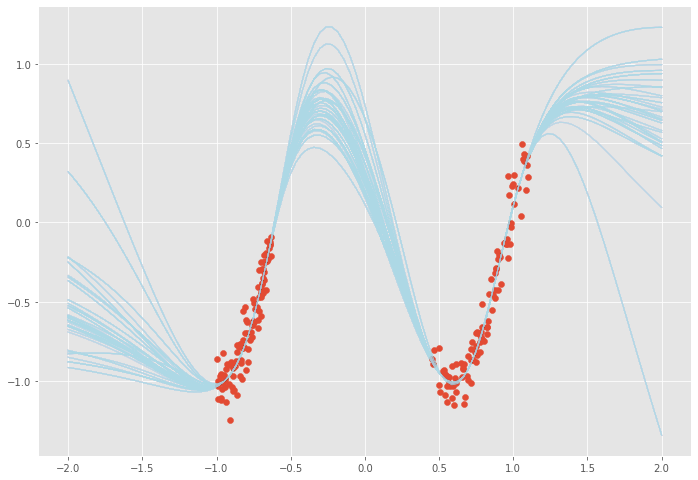

In [15]:
x_test = torch.linspace(-2.0, 2.0).unsqueeze(1).to(device)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.scatter(x_data.cpu(), y_data.cpu())
for _ in range(1000):
    mix.sample_parameters()

    y_test = mix.forward(x_test)
    plt.plot(x_test.detach().cpu().numpy(), y_test.squeeze(0).detach().cpu().numpy(), alpha=0.05, linewidth=1, color='lightblue') 

In [31]:
mix.compute_elbo(x_data, y_data, n_samples_ELBO=1000, sigma_noise=0.1).detach().cpu().numpy()

array(12907.412, dtype=float32)